In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

    100% |████████████████████████████████| 993kB 19.9MB/s 
Uploaded file with ID 10wA54gFbj4dy9BCS420vRUaGZqiA813G


In [2]:
# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title yob1880.txt, id 15JIRqjpTxKYRkkOCvjB_a-n3OOuxpt8-
title Sample file.txt, id 10wA54gFbj4dy9BCS420vRUaGZqiA813G


In [3]:

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '15JIRqjpTxKYRkkOCvjB_a-n3OOuxpt8-' #https://drive.google.com/open?id=15JIRqjpTxKYRkkOCvjB_a-n3OOuxpt8-
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Downloaded content "Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288
Annie,F,1258
Clara,F,1226
Ella,F,1156
Florence,F,1063
Cora,F,1045
Martha,F,1040
Laura,F,1012
Nellie,F,995
Grace,F,982
Carrie,F,949
Maude,F,858
Mabel,F,808
Bessie,F,796
Jennie,F,793
Gertrude,F,787
Julia,F,783
Hattie,F,769
Edith,F,768
Mattie,F,704
Rose,F,700
Catherine,F,688
Lillian,F,672
Ada,F,652
Lillie,F,647
Helen,F,636
Jessie,F,635
Louise,F,635
Ethel,F,633
Lula,F,621
Myrtle,F,615
Eva,F,614
Frances,F,605
Lena,F,603
Lucy,F,590
Edna,F,588
Maggie,F,582
Pearl,F,569
Daisy,F,564
Fannie,F,560
Josephine,F,544
Dora,F,524
Rosa,F,507
Katherine,F,502
Agnes,F,473
Marie,F,471
Nora,F,471
May,F,462
Mamie,F,436
Blanche,F,427
Stella,F,414
Ellen,F,411
Nancy,F,410
Effie,F,406
Sallie,F,404
Nettie,F,403
Della,F,391
Lizzie,F,388
Flora,F,365
Susie,F,361
Maud,F,345
Mae,F,344
Etta,F,323
Harriet,F,319
Sadie,F,317
Caroline,F,306
Katie,F,303
Lydia,F,302
Elsie,F,3

In [0]:
downloaded.GetContentFile('yob1880.csv')

In [5]:
!ls

adc.json  sample_data  yob1880.csv


# Pandas

In [7]:
import pandas as pd
df=pd.read_csv('yob1880.csv')
df.head()

,Mary,F,7065
0,Anna,F,2604
1,Emma,F,2003
2,Elizabeth,F,1939
3,Minnie,F,1746
4,Margaret,F,1578


In [8]:
df.tail()

,Mary,F,7065
1994,Woodie,M,5
1995,Worthy,M,5
1996,Wright,M,5
1997,York,M,5
1998,Zachariah,M,5


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
dir(df)

['F',
 'Mary',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '_

In [11]:
len(df)

1999

In [13]:
df.shape

(1999, 3)

In [14]:
df.loc[5]

Mary     Ida
F          F
7065    1472
Name: 5, dtype: object

In [15]:
df.loc[5][1]

'F'

In [19]:
df_short=df[0:10] #to store a subset of rows
df_short

,Mary,F,7065
0,Anna,F,2604
1,Emma,F,2003
2,Elizabeth,F,1939
3,Minnie,F,1746
4,Margaret,F,1578
5,Ida,F,1472
6,Alice,F,1414
7,Bertha,F,1320
8,Sarah,F,1288
9,Annie,F,1258


In [20]:
df_short.shape

(10, 3)

In [21]:
df_short.head()

,Mary,F,7065
0,Anna,F,2604
1,Emma,F,2003
2,Elizabeth,F,1939
3,Minnie,F,1746
4,Margaret,F,1578


In [28]:
df_short_col=df[['Mary','7065']]
df_short_col.head()

,Mary,7065
0,Anna,2604
1,Emma,2003
2,Elizabeth,1939
3,Minnie,1746
4,Margaret,1578


In [0]:
#if for any int/float features, following can be used
#df_short_col=df_short_col[df_short_col['int_feature']>50]
#df_short_col['int_feature'].mean()
#df_short_col['int_feature'].count()
#df_short_col['int_feature'].describe()-gives mean,std,min..
#df_short_col=df_short_col[df_short_col['int_feature']>50]['feature'].mean()
#g=df_short_col.groupby(['recurring_int_feature'])
#for key,df_key in g:
#   print(key)
#   print(df_key)
#df_short_col.groupby(['recurring_int_feature']).mean()
#df_short_col.groupby(['recurring_int_feature']).max()
#df_short_col.groupby(['recurring_int_feature']).describe()
#
#

In [33]:
df_short_col.describe()

,7065
count,1999.000000
mean,97.258129
std,439.407357
min,5.000000
25%,7.000000
50%,13.000000
75%,41.000000
max,9655.000000


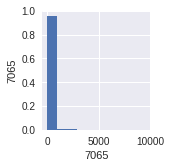

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
ax=sns.pairplot(df_short_col,diag_kind='hist')

In [0]:
data=pd.read_csv('market_data.csv')
data=pd.read_csv(filepath, header=none, names=col_names,na_values=-1)
data=pd.read_csv(filepath, header=none, names=col_names, na_values={'sunspots':[' -1']})
data=pd.read_csv(filepath, header=0,names=col_names, na_values={'sunspots':[' -1']}, parse_dates=[[0,1,2]])
data=pd.read_csv('datasets/marketdata.csv',index_col=0)
no_headers = pd.read_csv('python-passing-TDs-2017.csv', sep=',', header=None, names=cols)
df2 = pd.read_csv('file_messy', delimiter=' ', header=3, comment='#')
data=pd.read_csv(filepath, index_cols='date', parse_dates=True)
mean = pd.read_csv('mean_temp.csv', index_col='Month')
data = pd.read_csv(file, nrows=5, header=None)
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')
df = pd.read_csv(url,sep=';')
train = pd.read_csv("train.csv", skiprows=range(1, 144903891), nrows=10000000, dtype=dtypes, usecols=colnames)
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")

df=pd.read_html(..)
df=pd.read_json(..)
df = pd.read_json("/home/satya/Loan_Predictions/train.json")
t = pd.read_hdf('train.h5')

df=pd.read_sql(..)
xl = pd.read_excel(url, sheetname=None)
xl = pd.ExcelFile(file)

print(data)
data.head()
data['label'].head()
df.label.head(8)
data.tail(20)
data.describe()
num_tele.describe(percentiles=[.25,.5,.75,.90,.95,.99])
data.info()
data[40:60]
data.columns
medals.columns = new_labels
temps_c.columns = temps_f.str.replace('F', 'C')
data.shape
data.index
df.index=df.index.str.upper()
df.index=df.index.map(str.lower())
election['color'] = election.winner.map(col_dict)
data.values
data[['state','country']]
df['column'] or df.column                # return a series
df[['col_x', 'col_y']]                         # returns a dataframe

df2 = df.copy()
df2['newcol'] = [0, 50, 99, 231]
df[df.population > 10000000]
df.salt < 60
df[(df.salt > 50) & (df.eggs < 200)]
df['target'] = df['target'].astype('uint16')
df.label = df.label.astype('category')
prod_data['Product_Category'] = prod_data['Product_Category'].astype('category')
100*(train['target_var'].astype('object').value_counts()/len(train.index))  # target variable distribution
dib['Diabetes'] = dib['Diabetes'].map({'Yes': 1, 'No': 0})

dummies = pd.get_dummies(df[['label']], prefix_sep='_')
gen = pd.get_dummies(telecom['gender'], prefix='gender', drop_first=True)
iris_y= pd.get_dummies(iris_y).values
pd.get_dummies(data.Area, prefix='Area').head()
pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:].head()
data.std()
data.irow(0)
data.ix[datetime(2013, 1, 1)]
data.events.unique()
data.dtypes
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
list(data.columns.values)[2:8]
targetNames = data["epoch"].unique().tolist()

iloc_subset=data.iloc[20:31, 5:8]
data.iloc[:6, :]
data.iloc[-8:, :]
df.iloc[::3, -1] = np.nan            # Numpy NAN
df.iloc[4, 2]
df.iloc[[0,4,6], 0:2]
df.iloc[[3, 7, 8]]
df.iloc[[True, True, True, False, True, False]]

loc_subset=data.loc[15:28, 'Sales':'Profit']
df.loc['May']['spam']
election.loc['Bedford', 'winner']
df.loc[:, 'eggs':'salt']
df.loc['Jan':'Apr', :]
election.loc[:, :'Obama']
election.loc[['Phil', 'Centre', 'Fulton'], ['winner', 'Obama', 'Romney']]
for index, text in df.iterrows():
df.loc[[True, True, True, False, True, False]]
df.loc[(df.Sales > 2000) | (df.Profit > 100), :]
df_2.loc[(df_2['Product_Category'] == 'OFFICE SUPPLIES') & (df_2['Customer_Segment'] == 'CORPORATE'), :]

df.all()
df.any()
df.loc[:, df.all()]                          # all nonzero entries
df.loc[:, df.any()]                        # any nonzero entries
tele.isnull().sum()
round(100*(tele.isnull().sum()/len(tele.index)), 2)
df.loc[:, df.isnull().any()]              # any nan entries
df.loc[:, df.notnull().all()]             # all entries other than nan entries
tele = tele[~np.isnan(tele['TotalCharges'])]
tele['MultiLines'].value_counts()
df.contn.value_counts(dropna=False)
df['contn'].value_counts(dropna=False)
df.contn.value_counts(dropna=False).head()

print(len(high_value_where.dropna(axis=0)))
df.dropna(axis=1, how='all')
for chunk in pd.read_csv('data.csv', chunksize=10000): ...
df.dropna(how='any')
df.dropna(axis=1, how='all')
df.fillna(df.mean())
df['Depeche'].fillna(df['Depeche'].mode())
print(df.dropna(thresh=1000, axis='columns').info())
data.drop('Reported', axis=1, inplace=True)
data.drop(['Col1','Col2','Col3'], axis=1)
df = df.drop('Timestamp', axis=1).drop('Title', axis=1).drop('Genres', axis=1)
telecom['TotalCharges'] = telecom['TotalCharges'].convert_objects(convert_numeric=True)
RFM.index = pd.RangeIndex(len(RFM.index))


telecom.corr()

Pandas Series:
Pandas Series is a one-dimensional array of indexed data.
first_series=pd.Series()
second_series=pd.Series(np.arange(6, 18, 2))
print(second_series)
third_series=pd.Series(['Mango', 'Apple', 'Banana', 'Grape'])
s = pd.Series([3, 8, 9, 1])
first_series.values
third_series.index=['A', 'B', 'C', 'D']
print(third_series.index)
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'], index=['A', 'Z', 'C', 'Y', 'E'])
num_unique_labels = df[LABELS].apply(pd.Series.nunique)
combined_master['Cust_id_new'] = combined_master['Cust_id'].apply(get_id)
s[3]
s[[1, 3]]
df['salt']['Jan']
df.salt['Jan']
df['eggs'][1:6]
p_counties_rev = election.loc['Perry':'Potter':-1, 'state']
date_series = pd.date_range(start = '11-09-2017', end = '12-12-2017')

from pandas import DataFrame
DataFrame is a generalization of a NumPy array or Python dictionary.
first_df=pd.DataFrame({'A':[1,2,3,4], 'B':[8,7,6,5]]})
users=pd.DataFrame(data_dict)
df = pd.DataFrame(np.random.randn(7, 2))
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
df=pd.DataFrame(x, columns=iris.features)
df = pd.DataFrame({'name': ['Vinay', 'Kushal', 'Aman', 'Saif'], 
                   'age': [22, 25, 24, 28], 
                    'occupation': ['engineer', 'doctor', 'data analyst', 'teacher']})
users['new_col'] = 0                      # broadcasting, to entire column
df.columns = list_labels
df.index
df.reset_index(drop=True, inplace=True)
df_2 = df.set_index('X', inplace = False)
my_dataframe.to_csv('path_to_file.csv')
df[['salt', 'eggs']]
p_counties_rev = election.loc['Potter':'Perry':-1]
for f in files: df.append(pd.read_csv(f))
bfs = [pd.read_csv(f) for f in files]
print(train.memory_usage())
df.memory_usage(index=False)
df.nbytes//(1024*2)
final.rename(columns={ 1 : 'Churn_Prob'})
final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1)

loc_subset.sort_index(axis=0, ascending=False, inplace=True)
print(df.sort_values(by='labels'))
loc_subset.sort_values(by='Sales', ascending=True, inplace=False)
loc_subset.sort_values(by=['Profit','Sales'], ascending=True, inplace=True)
data.ColName.sort_values(ascending=False).head(25)

pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,left_index=False, right_index=False, sort=True, suffixes=('_x', '_y'), copy=True, indicator=False)
merged_frame=pd.merge(frame1, frame2,on='prod_id', how='outer')
pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')
result = pd.merge(left, right, left_index=True, right_index=True, how='inner');
merged_df = movies_df.merge(ratings_df, on='MovieID')
result = left.join(right, how='inner')

pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)
result = pd.concat(frames)
result = pd.concat(frames, keys=['x', 'y', 'z'])
result = pd.concat([df1, s2, s2, s2], axis=1)
pd.concat([s3, s4, s5], axis=1, keys=['red', 'blue', 'yellow'])
result = df1.append(df2)
result = df1.append([df2, df3])
long_df = pd.melt(wide_df, id_vars=['Firstname', 'Lastname', 'Age'], value_vars=['Current Balance', 'Saving Balance', 'Deposit Balance'])
long_df = pd.melt(df, id_vars=list(id_vars), value_vars=list(value_vars))

val=master.query('<sql query>)
high_value = combined_master.query('Sales >1000 and Order_Quantity <30')
high_value_where = combined_master.where(combined_master.Sales >1000, combined_master.Order_Quantity <30, axis =1)
df.groupby('Customer_Segment')
master.groupby(['Product_category', 'Product_sub_category']).count
combined_master.groupby(['Product_Category'])['Sales'].mean()
combined_master.groupby(['Product_Category', 'Product_Sub_Category'])[['Sales','Profit']].sum()
groupings.agg([np.sum, np.mean, np.std])
app_target = train.groupby('col_name1').col_name2.agg(['mean', 'count'])
frequent_apps = train.groupby('app').size().reset_index(name='count')
pivot=master.drop_duplicates(subset='Ship_Date', inplace=)

pivoted = df.pivot('date', 'variable')
pivoted=pd.pivot_table()
pd.pivot_table(df, values='D', index=pd.Grouper(freq='M', key='F'), columns='C')
pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'])
ct = pd.crosstab(df['labels'], df['species'])
football.to_excel('football.xlsx', index=False)
df2 = df.reindex(order_list)
df2 = df.reindex(df3.index)
df.sort_index()
weather3 = weather1.sort_index(ascending=False)
df.sort_values()
weather4 = weather1.sort_values('Max TemperatureF')
weather3 = weather1.reindex(year).ffill()
hank = pd.read_clipboard()
from_url = pd.read_table(url, sep='\t')
docs = pd.read_table('SMSSpamCollection', header=None, names=['Class', 'sms'])

df.add(df2)
df.add(df4, fill_value=0)
df.add(df2, fill_value=0).add(df3, fill_value=0)
pounds = dollars.multiply(exchange['INR/USD'],axis='rows')
df.divide(wk_mean, axis='rows')
df.floordiv(6)
df['eggs_in_dozens'] = df.eggs.floordiv(12)
np.floor_divide(df, 12)
df.pct_change() * 100
df.apply(my_funct)
df_celsius = weather[['Mean TemperatureF', 'Mean Dew PointF']].apply(to_celsius)
yearly = post2008.resample('A').last()

numpy_array = docs.as_matrix()

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 400)
pd.set_option('mode.sim_interactive', True)
pd.options.display.max_rows
pd.options.display.max_rows = 999
pd.get_option("display.max_rows")
pd.set_option('expand_frame_repr', False)
pd.set_option('large_repr', 'truncate')
pd.set_option('precision', 4)
pd.set_option('chop_threshold', .5)
pd.reset_option('chop_threshold')
pd.set_option('display.unicode.east_asian_width', True)

data.to_csv('sunspots.csv')
df.to_csv('sunspots.tsv', sep='\t')
df2.to_csv(file_clean, index=False)
sss.to_excel(out_xlsx_file)
df2.to_excel('file_clean.xlsx', index=False)

df['population'].plot('hist')
df.plot(color='b',style='.-', legend=True)
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)
df.boxplot(column='population', by='continent')
df.boxplot(column='initial_cost', by='Borough', rot=90)
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
data.loc['2001':'2004',['open', 'close', 'high', 'low']].plot()
df.plot(subplots=True)
data.mtemp.plot()
data.mtemp.tail().plot(kind="bar", rot=10)
data.mtemp.hist()
pd.DataFrame.hist(data[['Age']])

to_datetime(arg, errors='raise', dayfirst=False, yearfirst=False, utc=None, box=True, format=None, exact=True, unit=None, infer_datetime_format=False, origin='unix')
df['datetime'] = pd.to_datetime(df['click_time'])
>>> pd.to_datetime(df)
>>> pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format = "%d/%m/%y %H:%M")
>>> pd.to_datetime(s, infer_datetime_format=False)
>>> pd.to_datetime(1490195805, unit='s')
>>> pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1960-01-01'))
>>> [d.date() for d in pd.to_datetime(dates)]
>>> pd.to_datetime(datetimes).to_pydatetime().tolist()
df['year'] = df['Order_Date'].dt.year
df['day_of_week'] = df['datetime'].dt.dayofweek
df["day_of_year"] = df["datetime"].dt.dayofyear
df["month"] = df["datetime"].dt.month
df["hour"] = df["datetime"].dt.hour

pd.scatter_matrix(df, c=y, figszie=[8,8], s=150, marker='D')
pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

docs['Class'] = docs.Class.map({'cinema':0, 'education':1})
docs.Class.value_counts()

from pandas.core import datetools

import pandas_datareader as pdr
aapl = pdr.get_data_yahoo('AAPL',  start=datetime.datetime(2006, 10, 1),  end=datetime.datetime(2012, 1, 1)
                          